# Simple NN example from pytorch

In [62]:
import torch
import torchvision
import torchvision.transforms as transforms

Download CIFAR-10 dataset

In [63]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 5

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [64]:
num_epochs = 10
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


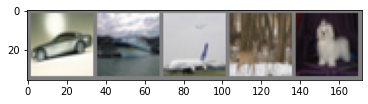

car      ship     plane    deer     dog     


In [65]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:8s}' for j in range(batch_size)))

In [66]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [67]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train the network

In [68]:
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.058
[1,  4000] loss: 1.663
[1,  6000] loss: 1.506
[1,  8000] loss: 1.399
[1, 10000] loss: 1.300
[2,  2000] loss: 1.219
[2,  4000] loss: 1.156
[2,  6000] loss: 1.112
[2,  8000] loss: 1.057
[2, 10000] loss: 1.043
[3,  2000] loss: 0.932
[3,  4000] loss: 0.934
[3,  6000] loss: 0.911
[3,  8000] loss: 0.895
[3, 10000] loss: 0.877
[4,  2000] loss: 0.760
[4,  4000] loss: 0.772
[4,  6000] loss: 0.772
[4,  8000] loss: 0.766
[4, 10000] loss: 0.755
[5,  2000] loss: 0.628
[5,  4000] loss: 0.634
[5,  6000] loss: 0.653
[5,  8000] loss: 0.672
[5, 10000] loss: 0.661
[6,  2000] loss: 0.509
[6,  4000] loss: 0.543
[6,  6000] loss: 0.553
[6,  8000] loss: 0.560
[6, 10000] loss: 0.589
[7,  2000] loss: 0.403
[7,  4000] loss: 0.437
[7,  6000] loss: 0.459
[7,  8000] loss: 0.483
[7, 10000] loss: 0.500
[8,  2000] loss: 0.322
[8,  4000] loss: 0.359
[8,  6000] loss: 0.377
[8,  8000] loss: 0.406
[8, 10000] loss: 0.415
[9,  2000] loss: 0.256
[9,  4000] loss: 0.285
[9,  6000] loss: 0.314
[9,  8000] 

In [69]:
# save the model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Test network on test data

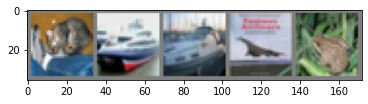

GroundTruth:  cat   ship  ship  plane frog 


In [70]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [71]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [72]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

Predicted:  dog   car   ship  plane deer 


In [73]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %


In [74]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 79.5 %
Accuracy for class: car   is 87.8 %
Accuracy for class: bird  is 56.0 %
Accuracy for class: cat   is 55.8 %
Accuracy for class: deer  is 61.9 %
Accuracy for class: dog   is 60.6 %
Accuracy for class: frog  is 78.1 %
Accuracy for class: horse is 72.7 %
Accuracy for class: ship  is 80.7 %
Accuracy for class: truck is 79.1 %
